In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Loads in the World Bank data into a a pandas dataframe.
df = pd.read_csv('./EDA/71db868b-4e7f-49bb-a844-283ed301d915_Data.csv')
# Loads an additonal feature from the World Bank into a data frame. 
df2=pd.read_csv('./EDA/e8b624e3-c04a-49dd-ab0e-a59f3020650b_Data.csv')

# Adds the feature to the origonal World Bank dataframe. 
df['Exports of goods and services (annual % growth) [NE.EXP.GNFS.KD.ZG]']= df2['Exports of goods and services (annual % growth) [NE.EXP.GNFS.KD.ZG]']

# Cleans the dataframe, removing unnecessary entryies from the download
df.where(df['Time']!=('Data from database: World Development Indicators'),inplace=True)
df.where(df['Time']!=('Last Updated: 04/26/2021'),inplace=True)
df.drop(columns=['Time Code','Country Code'], inplace=True)
df.dropna(how='all',inplace=True)

In [3]:
df

,Time,Country Name,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],...,"Taxes on income, profits and capital gains (% of total taxes) [GC.TAX.YPKG.ZS]","Taxes on income, profits and capital gains (current LCU) [GC.TAX.YPKG.CN]",Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS],Adequacy of social protection and labor programs (% of total welfare of beneficiary households) [per_allsp.adq_pop_tot],Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot],Adequacy of social safety net programs (% of total welfare of beneficiary households) [per_sa_allsa.adq_pop_tot],Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot],Number of people spending more than 25% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.25.TO],Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO],Exports of goods and services (annual % growth) [NE.EXP.GNFS.KD.ZG]
0,1960,Andorra,13411,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,1960,Austria,7047539,..,68.5856097560976,..,..,..,..,1.4581856994971,...,..,..,..,..,..,..,..,..,..,..
2,1960,Belgium,9153489,..,69.7019512195122,..,..,..,..,3.39734786713587,...,..,..,..,..,..,..,..,..,..,..
3,1960,Bermuda,44400,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,1960,Canada,17909009,..,71.1331707317073,..,..,..,..,4.18525654025553,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2020,Spain,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2497,2020,Sweden,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2498,2020,Switzerland,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2499,2020,United Kingdom,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [4]:
# The World bank fill null values with '..'.
# This replaces '..' with a null value
df.replace('..',np.nan,inplace=True)

In [5]:
# Changes all the columns except 'Country Name' to data type int or float.
for col in df.columns:
    if col != 'Country Name':
        df[col] = pd.to_numeric(df[col])

In [6]:
# Removes the last 3 years of data since those years have more than usual missing data.
df=df[df['Time']!=2020]
df=df[df['Time']!=2019]
df=df[df['Time']!=2018]

In [7]:
# This code displays how many values are null the column. Using '.info()' method did not dispaly every one.
for col in df.columns:
    if col != 'Country Name':
        print(df[col].isnull().sum(), col)
        print()

0 Time

0 Population, total [SP.POP.TOTL]

41 Population growth (annual %) [SP.POP.GROW]

399 Life expectancy at birth, total (years) [SP.DYN.LE00.IN]

678 GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]

1029 Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]

1029 Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]

1029 Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]

884 Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]

2378 External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]

605 GDP per capita (current US$) [NY.GDP.PCAP.CD]

1060 Exports of goods and services (constant 2010 US$) [NE.EXP.GNFS.KD]

687 GDP (constant 2010 US$) [NY.GDP.MKTP.KD]

1337 GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]

1337 GNI (constant 2010 US$) [NY.GNP.MKTP.KD]

1328 GNI growth (annual %) [NY.GNP.MKTP.KD.ZG]

1079 Gross capital formation (constant 2010 US$) [NE.GDI.TOTL.KD]

1029 Gross domestic savings (% of GDP) [NY.GDS.TOTL.ZS]

1330 Gross savings (% of GDP) [NY.GNS.ICT

In [8]:
# Drops columns with lots of null values.

df.drop(columns=['Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]',
                 'Number of people spending more than 25% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.25.TO]',
                 'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
                 'Adequacy of social safety net programs (% of total welfare of beneficiary households) [per_sa_allsa.adq_pop_tot]',
                 'Adequacy of social insurance programs (% of total welfare of beneficiary households) [per_si_allsi.adq_pop_tot]',
                 'Adequacy of social protection and labor programs (% of total welfare of beneficiary households) [per_allsp.adq_pop_tot]',
                 'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
                 'Bound rate, simple mean, all products (%) [TM.TAX.MRCH.BR.ZS]',
                 'Profit tax (% of commercial profits) [IC.TAX.PRFT.CP.ZS]',
                 'Business extent of disclosure index (0=less disclosure to 10=more disclosure) [IC.BUS.DISC.XQ]',
                 'Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS]',
                 'Labor tax and contributions (% of commercial profits) [IC.TAX.LABR.CP.ZS]',
                 'Other taxes payable by businesses (% of commercial profits) [IC.TAX.OTHR.CP.ZS]',
                 'Ease of doing business index (1=most business-friendly regulations) [IC.BUS.EASE.XQ]',
                 'Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]',
                 'Out-of-pocket expenditure per capita (current US$) [SH.XPD.OOPC.PC.CD]',
                 'Out-of-pocket expenditure (% of current health expenditure) [SH.XPD.OOPC.CH.ZS]',
                 'Number of surgical procedures (per 100,000 population) [SH.SGR.PROC.P5]',
                 'Community health workers (per 1,000 people) [SH.MED.CMHW.P3]',
                 'Claims on other sectors of the domestic economy (% of GDP) [FS.AST.DOMO.GD.ZS]',
                 "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative) [SE.TER.CUAT.MS.ZS]",
                 "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative) [SE.TER.CUAT.BA.ZS]",
                 "Government expenditure per student, primary (% of GDP per capita) [SE.XPD.PRIM.PC.ZS]",
                 "Current education expenditure, secondary (% of total expenditure in secondary public institutions) [SE.XPD.CSEC.ZS]",
                 "Current education expenditure, tertiary (% of total expenditure in tertiary public institutions) [SE.XPD.CTER.ZS]",
                 'Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]',
                 'External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]',
                 'Gross savings (% of GDP) [NY.GNS.ICTR.ZS]',
                 'Gross savings (% of GNI) [NY.GNS.ICTR.GN.ZS]',
                 'GNI per capita (constant 2010 US$) [NY.GNP.PCAP.KD]',
                 'GNI (constant 2010 US$) [NY.GNP.MKTP.KD]',
                 'GNI growth (annual %) [NY.GNP.MKTP.KD.ZG]',
                 'Stocks traded, total value (% of GDP) [CM.MKT.TRAD.GD.ZS]'], inplace=True)

In [9]:
df

,Time,Country Name,"Population, total [SP.POP.TOTL]",Population growth (annual %) [SP.POP.GROW],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS],Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],...,Customs and other import duties (current LCU) [GC.TAX.IMPT.CN],Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS],Tax revenue (current LCU) [GC.TAX.TOTL.CN],Taxes on exports (current LCU) [GC.TAX.EXPT.CN],Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS],"Taxes on income, profits and capital gains (% of revenue) [GC.TAX.YPKG.RV.ZS]","Taxes on income, profits and capital gains (% of total taxes) [GC.TAX.YPKG.ZS]","Taxes on income, profits and capital gains (current LCU) [GC.TAX.YPKG.CN]",Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS],Exports of goods and services (annual % growth) [NE.EXP.GNFS.KD.ZG]
0,1960,Andorra,13411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,Austria,7047539.0,NaN,68.585610,NaN,NaN,NaN,NaN,1.458186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,Belgium,9153489.0,NaN,69.701951,NaN,NaN,NaN,NaN,3.397348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960,Bermuda,44400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,Canada,17909009.0,NaN,71.133171,NaN,NaN,NaN,NaN,4.185257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2017,Spain,46593236.0,0.234588,83.282927,2.973641,35.149462,31.543111,19.411172,1.230679,...,0.000000e+00,13.722311,1.594350e+11,0.0,9.232930,19.751106,40.614671,6.475400e+10,80.459999,5.511250
2374,2017,Sweden,10057698.0,1.347445,82.409756,2.567925,43.734722,41.200028,25.724710,1.024076,...,0.000000e+00,28.127385,1.300918e+12,0.0,14.476753,16.224225,19.398225,2.523550e+11,83.580002,4.131625
2375,2017,Switzerland,8451840.0,0.933156,83.551220,1.799409,65.032663,54.475368,23.698826,0.680615,...,1.102682e+09,10.287304,6.887778e+10,0.0,5.731965,24.593822,44.678147,3.077331e+10,80.919998,-0.194173
2376,2017,United Kingdom,66058859.0,0.679374,81.256098,1.892077,30.366125,31.579013,17.524631,1.766637,...,0.000000e+00,25.620961,5.307810e+11,0.0,13.366722,33.287677,46.062312,2.444900e+11,83.820000,6.101156


In [10]:
# Drops Countries that have a lot of missing data
country_list= ['Andorra',  'Bermuda' ,  'Channel Islands' , 
               'Faroe Islands' , 'Gibraltar' , 'Greenland' , 
               'Isle of Man' , 'Liechtenstein', 'Monaco', 'San Marino','Belgium',
               'Canada','Croatia','Cyprus','Czech Republic','Estonia','Greece',
               'Latvia','Lithuania','Poland','Romania','Slovak Republic','Slovenia','Spain',
              'Switzerland','Hungary','Iceland','Luxembourg','Portugal','United States','Ireland'  ]
for country in country_list:
    df = df[df['Country Name']!= country]

In [11]:
# Prints each contryis missing value by columns.
for country in df['Country Name'].unique(): 
    print(country, df[df['Time']>=1980].groupby('Country Name').get_group(country).shape[0])
    print(df[df['Time']>=1980].groupby('Country Name').get_group(country).isnull().sum())
    print()

Austria 38
Time                                                                                                                 0
Country Name                                                                                                         0
Population, total [SP.POP.TOTL]                                                                                      0
Population growth (annual %) [SP.POP.GROW]                                                                           0
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                             0
GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]                                                                            0
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                                                            0
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                                                            0
Gross capital formation (% of GDP) [N

In [12]:
# Sets the dataframe to the years 1980 and after.
df = df[df['Time']>=1980]

In [13]:
# Shows remaining countries in the dataset.
df['Country Name'].unique()

array(['Austria', 'Denmark', 'Finland', 'France', 'Germany', 'Italy',
       'Netherlands', 'Norway', 'Sweden', 'United Kingdom'], dtype=object)

In [14]:
# Sets missing values for Austria data to be the same as the closest year that has a value or average of 2 closest
df.at[1231,'Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = 77405.603517


# Fills missing value with data that is close to missing value
df.at[1395,'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]']=(11.07318+10.50612)/2
df.at[1518,'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]']=(9.74095+11.29195)/2


# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Austria')&
                                                                      (df['Time']<1998),
                                                                      9,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df.at[1395,'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]']=(5.25200+5.42835)/2
df.at[1518,'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]']=(5.25990+6.10374)/2

# Fills missing value with data that is close to missing value
df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] = np.where((df['Country Name']=='Austria')&
                                                                      (df['Time']<2001),
                                                                      10.521706,
                                                                    df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Austria')&
                                                                      ((df['Time']<1985) & (1980< df['Time'])),
                                                                      (11.20+ 10.90)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )




In [15]:
# sets missing values for Denmark data to be the same as the closest year that has a value or average of 2 closest
df.at[1239,'Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = 80415.976813

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      (df['Time']<1998),
                                                                      9,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df.at[2141,'Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = (3.13+3.07)/2

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']<1986) & (1980< df['Time'])),
                                                                      (5.91093+ 5.83825)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']<2017) & (2014< df['Time'])),
                                                                      (7.81608+ 7.63485)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']==1990)),
                                                                      (5.83814+ 5.59676)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']==1992)),
                                                                      (7.77282+ 5.59676)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']==1997)),
                                                                      (7.88494+ 8.10675)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']<1986) ),
                                                                      11.41570,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']<2017) & (2014< df['Time'])),
                                                                      (15.25762+ 13.82682)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']==1990)),
                                                                      (11.18606+ 10.60130)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']==1992)),
                                                                      (13.87737+ 10.60130)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Denmark')&
                                                                      ((df['Time']==1997)),
                                                                      (14.14248+ 14.63437)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

In [16]:
# sets missing values for Finland data to be the same as the closest year that has a value or average of 2 closest
df.at[1242,'Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = 61712.890129

# Fills missing value with data that is close to missing value
df.at[1529,'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = 6.85898
df.at[1570,'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = 5.86993

# Fills missing value with data that is close to missing value
df.at[1529,'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = 11.84667
df.at[1570,'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = 11.76006

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Finland')&
                                                                      (df['Time']<1998),
                                                                      9,df['Compulsory education, duration (years) [SE.COM.DURS]'] )
# Fills missing value with data that is close to missing value
df.at[1652,'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] = 2.751196


# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Finland')&
                                                                      ((df['Time']<1985) & (1980< df['Time'])),
                                                                      (15.60+ 14.00)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Finland')&
                                                                      ((df['Time']<1990) & (1985< df['Time'])),
                                                                      (12.50+ 14.00)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )



In [17]:
# sets missing values for France data to be the same as the closest year that has a value or average of 2 closest
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='France')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='France')&(df['Time']==1991)]['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'],
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='France')&
                                                                      ((df['Time']<2017) & (1998< df['Time'])),
                                                                      (5.45160+ 5.68792)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df.at[1530,'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = (5.75672+ 5.68792)/2

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='France')&
                                                                      (df['Time']<1998),
                                                                      10,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] = np.where((df['Country Name']=='France')&
                                                                      (df['Time']==2000),
                                                                      df.loc[(df['Country Name']=='France')&(df['Time']==2001)]['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'],
                                                                    df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='France')&
                                                                      ((df['Time']<2017) & (1998< df['Time'])),
                                                                      (10.74723+ 9.67858)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='France')&
                                                                      ((df['Time']==1997)),
                                                                      (10.74723+ 10.79635)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='France')&
                                                                      ((df['Time']==1980)),
                                                                      11.50818,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

In [18]:
# sets missing values for Germany data to be the same as the closest year that has a value or average of 2 closest
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Germany')&(df['Time']==1991)]['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'],
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Services, value added (% of GDP) [NV.SRV.TOTL.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Germany')&(df['Time']==1991)]['Services, value added (% of GDP) [NV.SRV.TOTL.ZS]'],
                                                                    df['Services, value added (% of GDP) [NV.SRV.TOTL.ZS]'] )

# Fills missing value with data that is close to missing value
df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Germany')&(df['Time']==1992)]['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'],
                                                                    df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )

df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']==1991),
                                                                      df.loc[(df['Country Name']=='Germany')&(df['Time']==1992)]['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'],
                                                                    df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )

df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where(((df['Country Name']=='Germany')&
                                                                      (df['Time']<1990)),
                                                                      3.546378,df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']<1998),
                                                                      13,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']==2000),
                                                                      df.loc[(df['Country Name']=='France')&(df['Time']==2001)]['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'],
                                                                    df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      ((df['Time']<1985) & (1980< df['Time'])),
                                                                      (11.50+ 11.00)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      ((df['Time']<1990) & (1985< df['Time'])),
                                                                      (10.40+ 11.00)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )

# Fills missing value with data that is close to missing value
df['Military expenditure (% of general government expenditure) [MS.MIL.XPND.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      ((df['Time']==1990)),
                                                                      4.352215,
                                                                    df['Military expenditure (% of general government expenditure) [MS.MIL.XPND.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      ((df['Time']<2006) & (1998< df['Time'])),
                                                                      (4.29396+ 4.46187)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

df.at[1531,'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = (4.46187+ 4.49471)/2

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      ((df['Time']<2006) & (1998< df['Time'])),
                                                                      (9.49249+ 9.26752)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )


df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      ((df['Time']<1993) & (1989< df['Time'])),
                                                                      9.58297,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

df.at[1531,'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = (9.26752+ 8.27008)/2


# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']<1993),
                                                                      4.407920,df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'] = np.where((df['Country Name']=='Germany')&
                                                                      (df['Time']<1991),
                                                                      7.629173,df['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'] )


In [19]:
# sets missing values for Italy data to be the same as the closest year that has a value or average of 2 closest
df['Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1986) & (1980< df['Time'])),
                                                                      (38.570833+ 46.146745)/2,
                                                                    df['Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where((df['Country Name']=='Italy')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Italy')&(df['Time']==1991)]['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'],
                                                                    df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )

# Fills missing value with data that is close to missing value
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='Italy')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Italy')&(df['Time']==1991)]['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'],
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1993) & (1988< df['Time'])),
                                                                      (4.59277+ 4.73389)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']==1987)),
                                                                      (4.59277+ 4.65490)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']==1997)),
                                                                      (4.44764+ 4.45031)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1983)),
                                                                      4.48806,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Italy')&
                                                                      (df['Time']<1995)),
                                                                      8.71679,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Italy')&
                                                                      (df['Time']==1997)),
                                                                      (9.11614+ 9.23890)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Italy')&
                                                                      (df['Time']<1998),
                                                                      8,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      (df['Time']==2000),
                                                                      df.loc[(df['Country Name']=='Italy')&(df['Time']==2001)]['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'],
                                                                    df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Other taxes (% of revenue) [GC.TAX.OTHR.RV.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1995) & (1989< df['Time'])),
                                                                      (1.187962+ 5.184745)/2,
                                                                    df['Other taxes (% of revenue) [GC.TAX.OTHR.RV.ZS]'] )

# Fills missing value with data that is close to missing value
df['Grants and other revenue (% of revenue) [GC.REV.GOTR.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1995) & (1989< df['Time'])),
                                                                      (3.087552+ 6.115806)/2,
                                                                    df['Grants and other revenue (% of revenue) [GC.REV.GOTR.ZS]'] )

# Fills missing value with data that is close to missing value
df['Revenue, excluding grants (current LCU) [GC.REV.XGRT.CN]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1995) & (1989< df['Time'])),
                                                                      (4.013290e+11+ 2.331839e+11)/2,
                                                                    df['Revenue, excluding grants (current LCU) [GC.REV.XGRT.CN]'] )

# Fills missing value with data that is close to missing value
df['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      (df['Time']<1990),
                                                                      12.231156,
                                                                    df['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'] )

# Fills missing value with data that is close to missing value
df['Taxes on income, profits and capital gains (% of revenue) [GC.TAX.YPKG.RV.ZS]'] = np.where((df['Country Name']=='Italy')&
                                                                      ((df['Time']<1995) & (1989< df['Time'])),
                                                                      (36.022394+ 32.251904)/2,
                                                                    df['Taxes on income, profits and capital gains (% of revenue) [GC.TAX.YPKG.RV.ZS]'] )

# Fills missing value with data that is close to missing value
df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where(((df['Country Name']=='Italy')&
                                                                      (df['Time']<1990)),
                                                                      1.575723,df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )



In [20]:
# sets missing values for Netherlands data to be the same as the closest year that has a value or average of 2 closest
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Netherlands')&(df['Time']==1991)]['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'],
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1989)),
                                                                      (5.47146+ 10.98549)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1992)),
                                                                      (5.16165+ 4.75661)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1997)),
                                                                      (4.49419+ 4.54057)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1980)),
                                                                      12.06790,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1989)),
                                                                      (10.55998+ 5.22879)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1992)),
                                                                      (11.07084+ 9.66667)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==1997)),
                                                                      (8.88747+ 10.42019)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Netherlands')&
                                                                      (df['Time']<1997),
                                                                      13,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] = np.where((df['Country Name']=='Netherlands')&
                                                                      (df['Time']==2000),
                                                                      df.loc[(df['Country Name']=='Netherlands')&(df['Time']==2001)]['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'],
                                                                    df['Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Netherlands')&
                                                                      ((df['Time']<1990)),
                                                                      5.80,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Netherlands')&
                                                                      ((df['Time']==2014)),
                                                                      (3.61+ 3.49)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )

In [21]:
# sets missing values for Norway data to be the same as the closest year that has a value or average of 2 closest
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='Norway')&
                                                                      (df['Time']==1990),
                                                                      90060.126323,
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where((df['Country Name']=='Norway')&
                                                                      (df['Time']==1980),
                                                                     14.619610,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )

# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Norway')&
                                                                      (df['Time']<1998),
                                                                      10,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Norway')&
                                                                      ((df['Time']<1986)),
                                                                      5.90,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )

# Fills missing value with data that is close to missing value
df['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'] = np.where((df['Country Name']=='Norway')&
                                                                      ((df['Time']==1994)),
                                                                      (6.45 +1.26) /2,
                                                                    df['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'] )

# Fills missing value with data that is close to missing value
df['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'] = np.where((df['Country Name']=='Norway')&
                                                                      ((df['Time']<1993) & (1989< df['Time'])),
                                                                      1.26,
                                                                    df['Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]'] )


In [22]:
# sets missing values for Sweden data to be the same as the closest year that has a value or average of 2 closest
df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where((df['Country Name']=='Sweden')&
                                                                      (df['Time']==1980),
                                                                      df.loc[(df['Country Name']=='Sweden')&(df['Time']==1981)]['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'],
                                                                    df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )

# Fills missing value with data that is close to missing value
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='Sweden')&
                                                                      (df['Time']==1990),
                                                                      df.loc[(df['Country Name']=='Sweden')&(df['Time']==1991)]['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'],
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='Sweden')&
                                                                      (df['Time']>1981)&(df['Time']<1990)),
                                                                      (6.78120+ 5.21219)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='Sweden')&
                                                                      (df['Time']==1994)),
                                                                      (5.50703+ 6.14814)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='Sweden')&
                                                                      (df['Time']==1997)),
                                                                      (6.83862+ 7.06125)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Sweden')&
                                                                      (df['Time']>1981)&(df['Time']<1990)),
                                                                      (10.19138+ 8.33703)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Sweden')&
                                                                      (df['Time']==1994)),
                                                                      (8.15380+ 10.23043)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='Sweden')&
                                                                      (df['Time']==1997)),
                                                                      (11.36323+ 12.75800)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )


# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='Sweden')&
                                                                      (df['Time']<1998),
                                                                      9,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Sweden')&
                                                                     ((df['Time']>1980)&(df['Time']<1985)),
                                                                      (15.10+ 14.60)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )
        
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='Sweden')&
                                                                     ((df['Time']>1985)&(df['Time']<1990)),
                                                                      (12.40+ 14.60)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )

In [23]:
# sets missing values for United Kingdom data to be the same as the closest year that has a value or average of 2 closest

df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] = np.where((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']<1991),
                                                                      df.loc[(df['Country Name']=='United Kingdom')&(df['Time']==1991)]['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'],
                                                                    df['Services, value added (annual % growth) [NV.SRV.TOTL.KD.ZG]'] )

# Fills missing value with data that is close to missing value
df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] = np.where((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']<1991),
                                                                      df.loc[(df['Country Name']=='United Kingdom')&(df['Time']==1991)]['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'],
                                                                    df['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==2012)),
                                                                      (5.59523+ 5.52980)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==1993)),
                                                                      (4.33449+ 4.85083)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )
df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==1997)),
                                                                      (4.38693+ 4.21202)/2,
                                                                    df['Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]'] )

# Fills missing value with data that is close to missing value
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==1980)),
                                                                      12.64421,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==1993)),
                                                                      (11.19357+ 11.88866)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==1997)),
                                                                      (11.75599+ 12.22012)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )
df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] = np.where(((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']==2012)),
                                                                      (12.69720+ 12.91605)/2,
                                                                    df['Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]'] )


# Fills missing value with data that is close to missing value
df['Compulsory education, duration (years) [SE.COM.DURS]'] = np.where((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']<1998),
                                                                      11,df['Compulsory education, duration (years) [SE.COM.DURS]'] )

# Fills missing value with data that is close to missing value
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='United Kingdom')&
                                                                     ((df['Time']>1980)&(df['Time']<1985)),
                                                                      (8.10+ 7.40)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )
        
df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] = np.where((df['Country Name']=='United Kingdom')&
                                                                     ((df['Time']>1985)&(df['Time']<1990)),
                                                                      (7.40+ 5.90)/2,
                                                                    df['Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]'] )

# Fills missing value with data that is close to missing value
df['Customs and other import duties (% of tax revenue) [GC.TAX.IMPT.ZS]'] = np.where((df['Country Name']=='United Kingdom') &
                                                                                      (df['Customs and other import duties (% of tax revenue) [GC.TAX.IMPT.ZS]']!=df['Customs and other import duties (% of tax revenue) [GC.TAX.IMPT.ZS]']),
                                                                                    0,
                                                                                    df['Customs and other import duties (% of tax revenue) [GC.TAX.IMPT.ZS]'])

# Fills missing value with data that is close to missing value
df['Customs and other import duties (current LCU) [GC.TAX.IMPT.CN]'] = np.where((df['Country Name']=='United Kingdom') &
                                                                                      (df['Customs and other import duties (current LCU) [GC.TAX.IMPT.CN]']!=df['Customs and other import duties (current LCU) [GC.TAX.IMPT.CN]']),
                                                                                    0,
                                                                                    df['Customs and other import duties (current LCU) [GC.TAX.IMPT.CN]'])

# Fills missing value with data that is close to missing value
df['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'] = np.where((df['Country Name']=='United Kingdom')&
                                                                      (df['Time']<1990),
                                                                      df.loc[(df['Country Name']=='United Kingdom')&(df['Time']==1990)]['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'],
                                                                    df['Taxes on goods and services (% value added of industry and services) [GC.TAX.GSRV.VA.ZS]'] )

In [26]:
# Drops columns that do not have data going back to 1980 and creates a dataframe with no null values
df1980 = df.drop(columns=['Services, value added per worker (constant 2010 US$) [NV.SRV.EMPL.KD]',
                     'Services, value added (% of GDP) [NV.SRV.TOTL.ZS]',
                     'Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]',
                     'Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD]',
                     'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
                     'Armed forces personnel (% of total labor force) [MS.MIL.TOTL.TF.ZS]',
                     'Armed forces personnel, total [MS.MIL.TOTL.P1]',
                     'Military expenditure (% of general government expenditure) [MS.MIL.XPND.ZS]',
                     'Tariff rate, applied, weighted mean, all products (%) [TM.TAX.MRCH.WM.AR.ZS]',
                     'Services, value added (% of GDP) [NV.SRV.TOTL.ZS]',
                     'Import value index (2000 = 100) [TM.VAL.MRCH.XD.WD]',
                     'Export value index (2000 = 100) [TX.VAL.MRCH.XD.WD]',
                     'Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS]',
                     'Grants and other revenue (current LCU) [GC.REV.GOTR.CN]',
                     'Grants and other revenue (% of revenue) [GC.REV.GOTR.ZS]',
                     'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]',
                     'Grants and other revenue (current LCU) [GC.REV.GOTR.CN]',
                     'Grants and other revenue (% of revenue) [GC.REV.GOTR.ZS]'])

In [27]:
# Drops columns that do not have data going back to 1990 and creates a dataframe with no null values
df1990=df[df['Time']>=1990].drop(columns=['Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD]',
                     'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
                     'Domestic private health expenditure per capita (current US$) [SH.XPD.PVTD.PC.CD]',
                     'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
                     'Import value index (2000 = 100) [TM.VAL.MRCH.XD.WD]',
                     'Export value index (2000 = 100) [TX.VAL.MRCH.XD.WD]',
                     'Labor force with advanced education (% of total working-age population with advanced education) [SL.TLF.ADVN.ZS]',
                     'Claims on central government, etc. (% GDP) [FS.AST.CGOV.GD.ZS]',
                     'Grants and other revenue (% of revenue) [GC.REV.GOTR.ZS]',
                     'Grants and other revenue (current LCU) [GC.REV.GOTR.CN]']
           )

In [29]:
# Drops columns that have a large number of missing values for one or more countries and creates a dataframe that is from 2000 on. 
df2000=df[df['Time']>=2000].drop(columns=['Grants and other revenue (current LCU) [GC.REV.GOTR.CN]',
                                          'Grants and other revenue (% of revenue) [GC.REV.GOTR.ZS]'])

In [31]:
# Sets X to all tax related features
X= df1980.loc[:,'Tax revenue (% of GDP) [GC.TAX.TOTL.GD.ZS]':'Taxes on income, profits and capital gains (current LCU) [GC.TAX.YPKG.CN]']

# Sets y to annual GDP growth
y=df1980['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']

In [34]:
# Splits X and y into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [36]:
# Fits a model to see is taxes can predict GDP growth
linreg_tax = LinearRegression()
linreg_tax.fit(X_train,y_train)
preds_tax=linreg_tax.predict(X_test)

# Shows the train and test scores from the model and they are very low.
linreg_tax.score(X_train,y_train),linreg_tax.score(X_test,y_test)

(0.05391463054611134, -0.07296351223880748)

In [38]:
# shows the mean squared error for the model.
mean_squared_error(y_test,preds_tax,squared=True)

3.246446875018691

In [705]:
# Shows the average correlation coefficient of all tax features compared to GDP growth.
X['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']= y
X.corr()['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]'][0:7].mean()

-0.015884657638948776

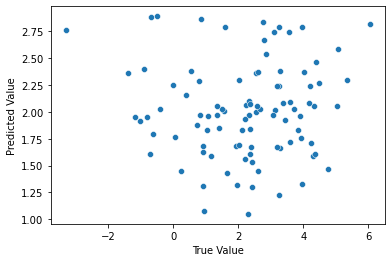

In [40]:
# Plots my models prediction against the true values for GDP growth.
fig = sns.scatterplot(y_test,preds_tax)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.savefig('./images/preds.jpg')

In [ ]:
# makes a dataframe with all the correlation coefficients in the 1980 dataframe 
df1980.corr()
corr_clean = pd.DataFrame(df.corr())
corr_clean.to_excel('./clean df/corr_clean.xlsx')

In [41]:
# Sets X to import and export growth
X= df1980[['Exports of goods and services (annual % growth) [NE.EXP.GNFS.KD.ZG]','Imports of goods and services (annual % growth) [NE.IMP.GNFS.KD.ZG]']]

# Sets y to GDP growth
y=df1980['GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]']

In [42]:
# Splits X and y into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [44]:
# Fits a model to see is taxes can predict GDP growth
linreg_imp_exp = LinearRegression()
linreg_imp_exp.fit(X_train,y_train)
preds=linreg_imp_exp.predict(X_test)

# Shows the train and test scores from the model which is a signifacnt improvement from the first model
linreg_imp_exp.score(X_train,y_train),linreg_imp_exp.score(X_test,y_test)

(0.6100526626633076, 0.5553968800078057)

In [46]:
# shows the mean squared error for the model.
mean_squared_error(y_test,preds,squared=True)

1.977412355507261

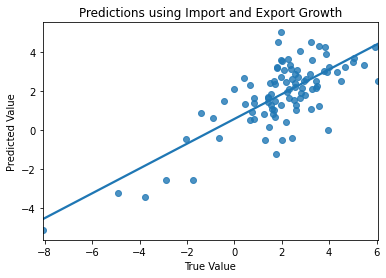

In [48]:
# Plots my models prediction against the true values for GDP growth.
sns.regplot(x=y_test,y=preds,ci=None)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predictions using Import and Export Growth')
plt.savefig('./images/preds_imp_exp.jpg')

In [627]:
# Saves the dataframes as an excel file.
df1980.to_excel('./clean df/df1980_clean.xlsx')
df1990.to_excel('./clean df/df1990_clean.xlsx')
df2000.to_excel('./clean df/df2000_clean.xlsx')